In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Stationary Test
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

import warnings
warnings.filterwarnings('ignore')

In [89]:
btc_df = pd.read_csv(r'coin_Bitcoin.csv')
eth_df = pd.read_csv(r'coin_Ethereum.csv')

## Data Exploration

### Bitcoin

In [90]:
btc_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [91]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [92]:
btc_df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


### Ethereum

In [93]:
eth_df.tail()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2155,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11
2159,2160,Ethereum,ETH,2021-07-06 23:59:59,2346.294874,2197.919385,2197.919385,2324.679449,2.089186e+10,2.710286e+11


In [94]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2160 non-null   int64  
 1   Name       2160 non-null   object 
 2   Symbol     2160 non-null   object 
 3   Date       2160 non-null   object 
 4   High       2160 non-null   float64
 5   Low        2160 non-null   float64
 6   Open       2160 non-null   float64
 7   Close      2160 non-null   float64
 8   Volume     2160 non-null   float64
 9   Marketcap  2160 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 168.9+ KB


In [95]:
eth_df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03
mean,1080.500000,398.258568,365.592589,382.879899,383.910691,7.057058e+09,4.172084e+10
std,623.682612,628.082281,566.611523,599.719862,601.078766,1.064526e+10,6.909184e+10
min,1.000000,0.482988,0.420897,0.431589,0.434829,1.021280e+05,3.221363e+07
25%,540.750000,14.265225,13.190950,13.757600,13.819200,3.825102e+07,1.135576e+09
50%,1080.500000,205.124631,193.302715,198.425096,198.643691,2.148880e+09,2.070063e+10
75%,1620.250000,396.494561,375.146804,386.264935,386.435272,9.629136e+09,4.231010e+10
max,2160.000000,4362.350542,3785.848603,4174.635873,4168.701049,8.448291e+10,4.828819e+11


## Data Visualization

In [96]:
eth_df.Date = pd.to_datetime(eth_df.Date)
btc_df.Date = pd.to_datetime(btc_df.Date)

In [97]:
eth_df.index = eth_df.Date
btc_df.index = btc_df.Date

In [98]:
btc_df['2020-01-01':'2020-05-29']

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,,
2020-01-01 23:59:59,2439,Bitcoin,BTC,2020-01-01 23:59:59,7254.330611,7174.944153,7194.891971,7200.174393,1.856566e+10,1.305808e+11
2020-01-02 23:59:59,2440,Bitcoin,BTC,2020-01-02 23:59:59,7212.155253,6935.269972,7202.551122,6985.470001,2.080208e+10,1.266994e+11
2020-01-03 23:59:59,2441,Bitcoin,BTC,2020-01-03 23:59:59,7413.715099,6914.995908,6984.428612,7344.884183,2.811148e+10,1.332334e+11
2020-01-04 23:59:59,2442,Bitcoin,BTC,2020-01-04 23:59:59,7427.385794,7309.514012,7345.375275,7410.656566,1.844427e+10,1.344425e+11
2020-01-05 23:59:59,2443,Bitcoin,BTC,2020-01-05 23:59:59,7544.496872,7400.535561,7410.451694,7411.317327,1.972507e+10,1.344695e+11
...,...,...,...,...,...,...,...,...,...,...
2020-05-25 23:59:59,2584,Bitcoin,BTC,2020-05-25 23:59:59,8951.005638,8719.668362,8786.107695,8906.934761,3.128816e+10,1.637605e+11
2020-05-26 23:59:59,2585,Bitcoin,BTC,2020-05-26 23:59:59,8991.967625,8757.293804,8909.586073,8835.053061,2.958419e+10,1.624455e+11
2020-05-27 23:59:59,2586,Bitcoin,BTC,2020-05-27 23:59:59,9203.320515,8834.157429,8837.381213,9181.017948,3.274054e+10,1.688147e+11


### Bitcoin

In [99]:
# Resampling to monthly frequency
df_month = btc_df.resample('M').mean()

# Resampling to annual frequency
df_year = btc_df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = btc_df.resample('Q-DEC').mean()

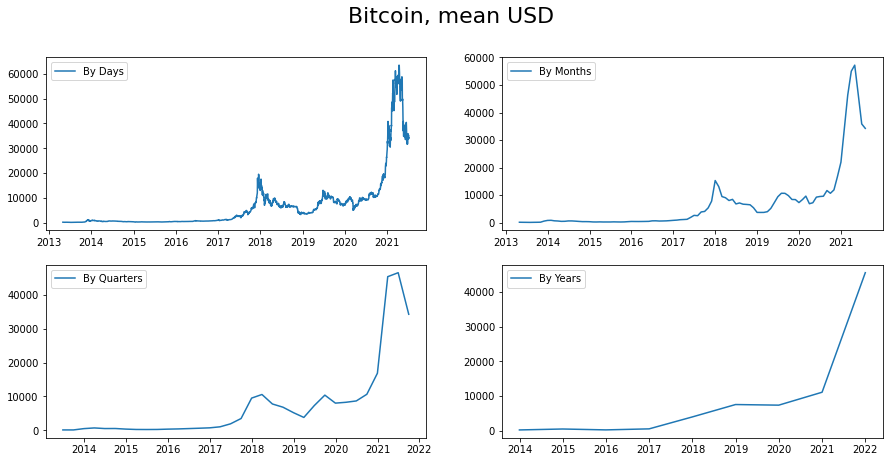

In [100]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(btc_df.Close, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Close, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

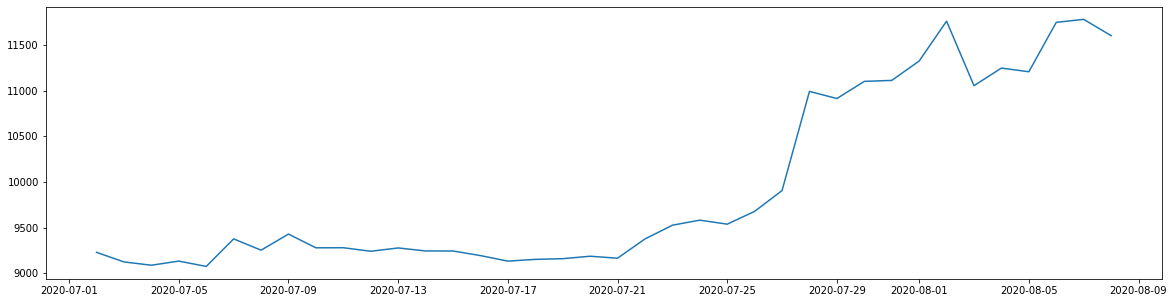

In [101]:
fig = plt.figure(figsize=(20, 5))
plt.plot(btc_df['2020-07-01 00:00:00':'2020-08-08 00:00:00'].Close )

### Ethereum

In [102]:
# Resampling to monthly frequency
df_month = eth_df.resample('M').mean()

# Resampling to annual frequency
df_year = eth_df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = eth_df.resample('Q-DEC').mean()

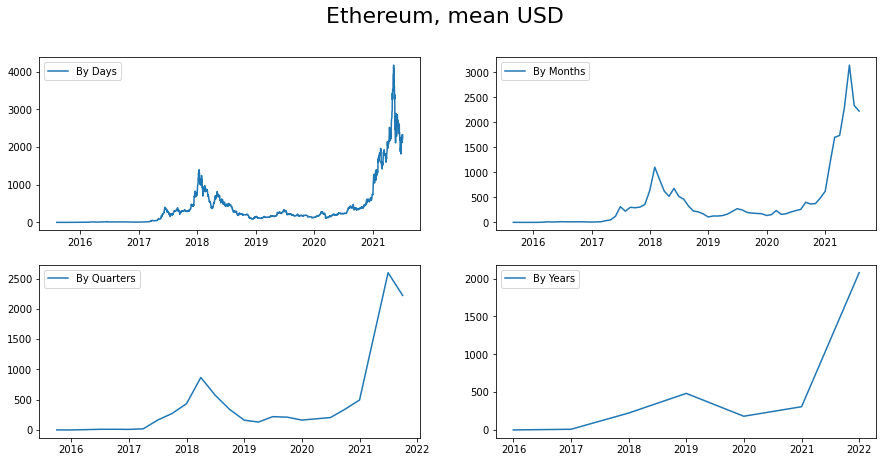

In [103]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Ethereum, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(eth_df.Close, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Close, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

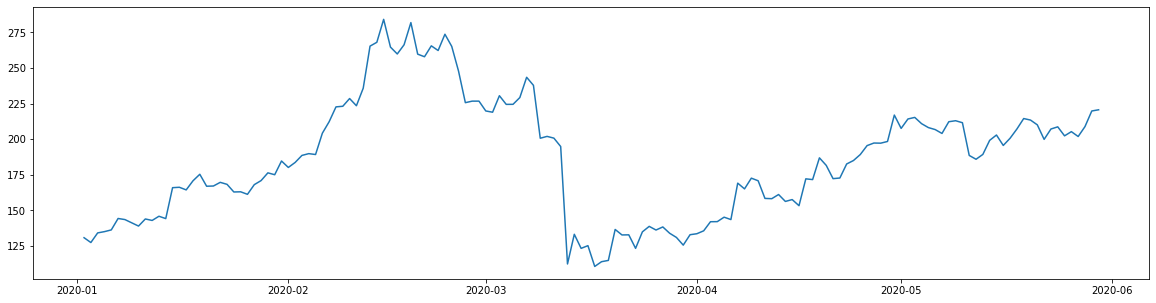

In [104]:
fig = plt.figure(figsize=(20, 5))
plt.plot(eth_df['2020-01-01 00:00:00':'2020-05-30 00:00:00'].Close)

## Stationary Test

### ADF

In [105]:
temp = btc_df['2020-01-01 00:00:00':'2020-05-30 00:00:00'].Close
result = adfuller(temp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.693662
p-value: 0.434381
Critical Values:
	1%: -3.475
	5%: -2.881
	10%: -2.577


In [106]:
temp = eth_df['2020-01-01 00:00:00':'2020-05-30 00:00:00'].Close
result = adfuller(temp)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.060260
p-value: 0.260791
Critical Values:
	1%: -3.476
	5%: -2.882
	10%: -2.578


### KPSS

In [107]:
temp = btc_df['2020-01-01 00:00:00':'2020-05-30 00:00:00'].Close
result = kpss(temp)
print('KPSS Statistic:: %f' % result[0])
print('p-value: %f' % result[1])
print('num lags: %f' % result[2])
print('Critical Values:')
for key, value in result[3].items():
	print('\t%s: %.3f' % (key, value))

KPSS Statistic:: 0.263833
p-value: 0.100000
num lags: 8.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


In [108]:
temp = eth_df['2020-01-01 00:00:00':'2020-05-30 00:00:00'].Close
result = kpss(temp)
print('KPSS Statistic:: %f' % result[0])
print('p-value: %f' % result[1])
print('num lags: %f' % result[2])
print('Critical Values:')
for key, value in result[3].items():
	print('\t%s: %.3f' % (key, value))

KPSS Statistic:: 0.161258
p-value: 0.100000
num lags: 8.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


## Preprocessing

In [109]:
btc_df = btc_df.loc['20150808235959':]

In [110]:
btc_d1 = []

for i in range(1, len(btc_df)):
    if btc_df['Close'][i-1] < btc_df['Close'][i]:
        btc_d1.append(1)
    else:
        btc_d1.append(0)

In [111]:
eth_d1 = []

for i in range(1, len(eth_df)):
    if eth_df['Close'][i-1] < eth_df['Close'][i]:
        eth_d1.append(1)
    else:
        eth_d1.append(0)

In [112]:
d = {'Date': btc_df['Date'][:-1], '+1D BTC': btc_d1, '+1D ETH': eth_d1}
df = pd.DataFrame(data= d)
df = df.drop('Date', axis=1)

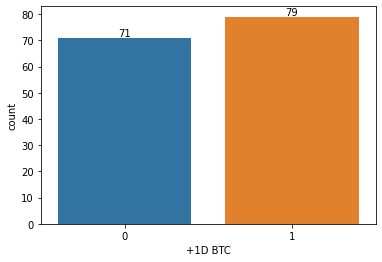

In [113]:
ax1 = sns.countplot(x=df['2020-01-01 00:00:00':'2020-05-30 00:00:00']['+1D BTC'])
ax1.bar_label(ax1.containers[0])
plt.show()

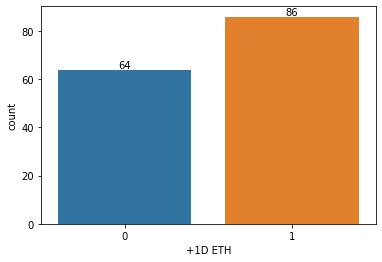

In [114]:
ax2 = sns.countplot(x =df['2020-01-01 00:00:00':'2020-05-30 00:00:00']['+1D ETH'])
ax2.bar_label(ax2.containers[0])
plt.show()

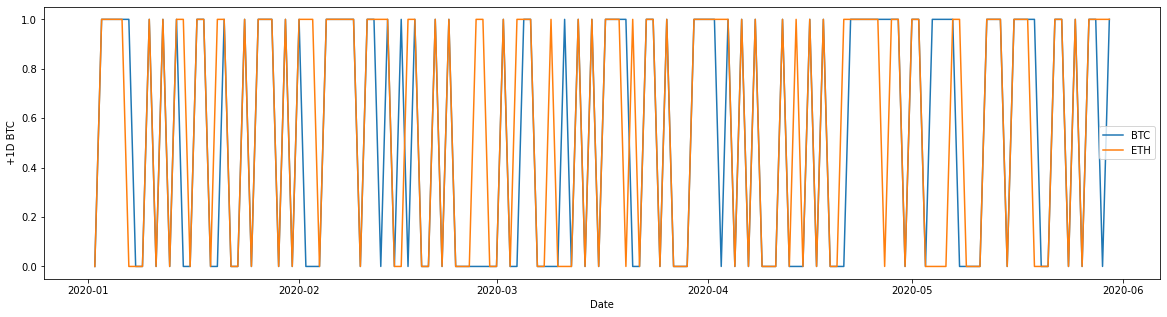

In [115]:
fig = plt.figure(figsize=(20, 5))
sns.lineplot(df['2020-01-01 00:00:00':'2020-05-30 00:00:00'].index, df['2020-01-01 00:00:00':'2020-05-30 00:00:00']['+1D BTC'], label='BTC')

sns.lineplot(df['2020-01-01 00:00:00':'2020-05-30 00:00:00'].index, df['2020-01-01 00:00:00':'2020-05-30 00:00:00']['+1D ETH'], label='ETH')
plt.show()

In [116]:
df['BTC_close'] = btc_df['Close']
df['ETH_close'] = eth_df['Close']

df.to_csv('Prices.csv')